<a href="https://colab.research.google.com/github/sergiomarchena16/lab_02_spam/blob/main/lab2_SPAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboraotrio 2 - Deteccion de SPAM (NLP)

## PARTE 1: INGENIERIRA DE CARACTERISTICAS

### importaciones

In [69]:
import pandas as pd
import numpy as np
import nltk
import unicodedata
import re
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer

### Datasets y arreglos necesarios

In [70]:
dataset1 = pd.read_csv('/content/drive/MyDrive/UVG /2022/SECURITY DATA SCIENCE/Lab02_SPAM/completeSpamAssassin.csv')
dataset2 = pd.read_csv('/content/drive/MyDrive/UVG /2022/SECURITY DATA SCIENCE/Lab02_SPAM/enronSpamSubset.csv')

In [71]:
dataset1

,Unnamed: 0,Body,Label
0,0,"\nSave up to 70% on Life Insurance.\nWhy Spend More Than You Have To?Life Quote Savings\nEnsuring your \n family's financial security is very important. Life Quote Savings makes \n buying life insurance simple and affordable. We Provide FREE Access to The \n Very Best Companies and The Lowest Rates.Life Quote Savings is FAST, EASY and \n SAVES you money! Let us help you get started with the best values in \n the country on new coverage. You can SAVE hundr...",1
1,1,"1) Fight The Risk of Cancer!\nhttp://www.adclick.ws/p.cfm?o=315&s=pk0072) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\nhttp://www.adclick.ws/p.cfm?o=249&s=pk0073) Get the Child Support You Deserve - Free Legal Advice\nhttp://www.adclick.ws/p.cfm?o=245&s=pk0024) Join the Web's Fastest Growing Singles Community\nhttp://www.adclick.ws/p.cfm?o=259&s=pk0075) Start Your Private Photo Album Online!\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007Have a Wonderful Day,\nOffer Manager\nPrizeMamaIf y...",1
2,2,"1) Fight The Risk of Cancer!\nhttp://www.adclick.ws/p.cfm?o=315&s=pk0072) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\nhttp://www.adclick.ws/p.cfm?o=249&s=pk0073) Get the Child Support You Deserve - Free Legal Advice\nhttp://www.adclick.ws/p.cfm?o=245&s=pk0024) Join the Web's Fastest Growing Singles Community\nhttp://www.adclick.ws/p.cfm?o=259&s=pk0075) Start Your Private Photo Album Online!\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007Have a Wonderful Day,\nOffer Manager\nPrizeMamaIf y...",1
3,3,##################################################\n# #\n# Adult Club #\n# Offers FREE Membership #\n# #\n##################################################>>>>> INSTANT ACCESS TO ALL SITES NOW\n>>>>> Your User Name And Password is.\n>>>>> User Name: zzzz@spamassassin.taint.org\n>>>>> Password: 7603825 of the Best Adult Sites on the Int...,1
4,4,I thought you might like these:\n1) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822slim12) Fight The Risk of Cancer! \nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822nic1 3) Get the Child Support You Deserve - Free Legal Advice \nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822ppl1Offer Manager\nDaily-Deals\nIf you wish to leave this list please use the link below.\nhttp://www.qves.com/trim/?social@linux.ie%7C29%7C134077\n-- \nIrish Linux User...,1
...,...,...,...
6041,6041,empty,0
6042,6042,___ ___ ___\n /\ \ /\ \ /\ \\n ___ |::\ \ \:\ \ /::\ \\n /\__\ |:|:\ \ \:\ \ /:/\:\ \\n /:/__/ __|:|\:\ \ ___ /::\ \ /:/ \:\ \\n /::\ \ /::::|_\:\__\ /\ /:/\:\__\ /:/__/ \:\__\\n \/\:\ \__ \:\~~\ \/__/ \:\/:/ \/__/ \:\ \ /:/ /\n ~~\:\/\__\ \:\ \ \::/__/ \:\ /:/ /\n \::/ / \:\ \ \:\ \ \:\/:/ /\n /:/ ...,0
6043,6043,"IN THIS ISSUE:01. Readers write\n02. Extension search\n03. Dumb messages revisited\n04. XP Tweak\n05. Hardware Diagnostic Tool\n06. Training Windows\n07. Hold that button\n08. Hagai's freeware\n09. Online helpAnd Coming Next Week!<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>\nMake Internet Explorer Faster, More Capable, and Secure! \nNNT's reviewers called Secure IE great, easy-to-use,awesome,\nimpressive, a total ""thumbs up""! Read what they're raving \nabout and get yours at...",0
6044,6044,empty,0


In [72]:
dataset2

,Unnamed: 0,Unnamed: 0.1,Body,Label
0,2469,2469,"Subject: stock promo mover : cwtd\n * * * urgent investor trading alert * * *\n weekly stock pick - - china world trade corp . ( ticker : cwtd )\n * * breaking news * *\n china world trade corp . enters into agreement to acquire\n majority stake in ceo clubs china limited ( the ceo clubs )\n tianhe , guangzhou , china - - ( market wire ) - - apr 7 , 2004 - - china world trade corp\n ( otc bb : cwtd . ob - news ) announced today that it has entered into an agreement to\n acquired majority sta...",1
1,5063,5063,"Subject: are you listed in major search engines ?\n submitting your website in search engines may increase\n your online sales dramatically .\n lf you invested time and money into your website , you\n simply must submit your website\n oniine otherwise it wili be invisible virtuaiiy , which means efforts spent in vain .\n lf you want\n peopie to know about your website and boost your revenues , the only way to do\n that is to\n make your site visible in places\n where people search for inform...",1
2,12564,12564,"Subject: important information thu , 30 jun 2005 .\n subject : important information thu , 30 jun 2005 .\n thank you for using our online store and for your previous order . we have updated our online software store - now we have more latest version of programs . our\n full catalog with 2100 freshest software titles available for instant download at\n web - site http : / / upsetting . tabloidez . com /\n we hope that you will tell others about your positive experience with us .\n with best w...",1
3,2796,2796,"Subject: = ? utf - 8 ? q ? bask your life with ? =\n = ? utf - 8 ? q ? individual incremen ? =\n = ? utf - 8 ? q ? t internal secretio ? =\n = ? utf - 8 ? q ? n ? =\n after the 25 years , our physical structure tardily arrests carries out\n a grave hormone known as mortal increase hormone .\n the step - down of it , which governs grades of other hormones\n in our trunk is directly answerable for all of the largest\n common signs of eld , such as wrinkles , white hair ,\n subsided energy , an...",1
4,1468,1468,"Subject: "" bidstogo "" is places to go , things to do\n hello ,\n privacy policy : to\n permanently opt out of our mailings simply\n send a blank email to optout @ bidstogo . biz .\n bidstogo invites you\n visit and explore\n http : / / www . bidstogo . biz / , the site\n dedicated to places to go and\n things to do . you can use\n bidstogo to advertise , sell or auction\n places to go and things to do - and right now it is free to make a basic\n listing .\n bidstogo is great for\n lodging\n ...",1
...,...,...,...,...
9995,26222,26222,"Subject: monday 22 nd oct\n louise ,\n do you have half an hour or so free in your diary on 22 / 10 a . m . so that i can see you whilst in houston ?\n david",0
9996,18630,18630,"Subject: missing bloomberg deals\n stephanie -\n i believe i ' ve found these trades . the first one already had bloomberg in as the broker along with the appropriate flat fee . the second deal did not have a broker or fee in it - those have been added . please let me know if you still don ' t see the trades .\n 639921 ( geir solberg ) - sell aep / 25 mw / sp - 15 / $ 105 - deal flows hours 14 through 18 , and broker fee reflects $ 15 flat times 4 trades - $ 60\n 640346 ( david porter ) - se...",0
9997,18451,18451,"Subject: eops salary survey questionnaire\n we will need to establish a deadline . will friday march 10 th work ?\n - - - - - - - - - - - - - - - - - - - - - - forwarded by kim melodick / hou / ect on 03 / 07 / 2000 05 : 14\n pm - - - - - - - - - - - - - - - - - - - - - - - - - - -\n kim melodick\n 02 / 18 / 2000 05 : 34 pm\n to : bob shults / hou / ect @ ect , robert superty / hou / ect @ ect , leslie\n reeves / hou / ect @ ect , sheila glover / hou / ect @ ect , kristin albrecht / hou / ec...",0
9998,21955,21955,"Subject: q 3 comparison\n hi louise ,\n i have a comparison for the first two weeks of q 3 . it is still so early , of co

In [73]:
# comparing Unnamed 0 and Unnamed 0.1 to see if they are the same
dataset2[['Unnamed: 0', 'Unnamed: 0.1']]

,Unnamed: 0,Unnamed: 0.1
0,2469,2469
1,5063,5063
2,12564,12564
3,2796,2796
4,1468,1468
...,...,...
9995,26222,26222
9996,18630,18630
9997,18451,18451
9998,21955,21955


In [74]:
dataset2['Unnamed: 0'].describe(), dataset2['Unnamed: 0.1'].describe()
# they are the same indeed :)

(count    10000.000000
 mean     17041.404600
 std       9735.989695
 min          8.000000
 25%       8562.000000
 50%      17159.000000
 75%      25509.250000
 max      33698.000000
 Name: Unnamed: 0, dtype: float64, count    10000.000000
 mean     17041.404600
 std       9735.989695
 min          8.000000
 25%       8562.000000
 50%      17159.000000
 75%      25509.250000
 max      33698.000000
 Name: Unnamed: 0.1, dtype: float64)

In [75]:
# merging the 2 datasets
frames = [dataset1, dataset2]
df = pd.concat(frames)
df

,Unnamed: 0,Body,Label,Unnamed: 0.1
0,0,"\nSave up to 70% on Life Insurance.\nWhy Spend More Than You Have To?Life Quote Savings\nEnsuring your \n family's financial security is very important. Life Quote Savings makes \n buying life insurance simple and affordable. We Provide FREE Access to The \n Very Best Companies and The Lowest Rates.Life Quote Savings is FAST, EASY and \n SAVES you money! Let us help you get started with the best values in \n the country on new coverage. You can SAVE hundr...",1,NaN
1,1,"1) Fight The Risk of Cancer!\nhttp://www.adclick.ws/p.cfm?o=315&s=pk0072) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\nhttp://www.adclick.ws/p.cfm?o=249&s=pk0073) Get the Child Support You Deserve - Free Legal Advice\nhttp://www.adclick.ws/p.cfm?o=245&s=pk0024) Join the Web's Fastest Growing Singles Community\nhttp://www.adclick.ws/p.cfm?o=259&s=pk0075) Start Your Private Photo Album Online!\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007Have a Wonderful Day,\nOffer Manager\nPrizeMamaIf y...",1,NaN
2,2,"1) Fight The Risk of Cancer!\nhttp://www.adclick.ws/p.cfm?o=315&s=pk0072) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\nhttp://www.adclick.ws/p.cfm?o=249&s=pk0073) Get the Child Support You Deserve - Free Legal Advice\nhttp://www.adclick.ws/p.cfm?o=245&s=pk0024) Join the Web's Fastest Growing Singles Community\nhttp://www.adclick.ws/p.cfm?o=259&s=pk0075) Start Your Private Photo Album Online!\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007Have a Wonderful Day,\nOffer Manager\nPrizeMamaIf y...",1,NaN
3,3,##################################################\n# #\n# Adult Club #\n# Offers FREE Membership #\n# #\n##################################################>>>>> INSTANT ACCESS TO ALL SITES NOW\n>>>>> Your User Name And Password is.\n>>>>> User Name: zzzz@spamassassin.taint.org\n>>>>> Password: 7603825 of the Best Adult Sites on the Int...,1,NaN
4,4,I thought you might like these:\n1) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822slim12) Fight The Risk of Cancer! \nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822nic1 3) Get the Child Support You Deserve - Free Legal Advice \nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822ppl1Offer Manager\nDaily-Deals\nIf you wish to leave this list please use the link below.\nhttp://www.qves.com/trim/?social@linux.ie%7C29%7C134077\n-- \nIrish Linux User...,1,NaN
...,...,...,...,...
9995,26222,"Subject: monday 22 nd oct\n louise ,\n do you have half an hour or so free in your diary on 22 / 10 a . m . so that i can see you whilst in houston ?\n david",0,26222.0
9996,18630,"Subject: missing bloomberg deals\n stephanie -\n i believe i ' ve found these trades . the first one already had bloomberg in as the broker along with the appropriate flat fee . the second deal did not have a broker or fee in it - those have been added . please let me know if you still don ' t see the trades .\n 639921 ( geir solberg ) - sell aep / 25 mw / sp - 15 / $ 105 - deal flows hours 14 through 18 , and broker fee reflects $ 15 flat times 4 trades - $ 60\n 640346 ( david porter ) - se...",0,18630.0
9997,18451,"Subject: eops salary survey questionnaire\n we will need to establish a deadline . will friday march 10 th work ?\n - - - - - - - - - - - - - - - - - - - - - - forwarded by kim melodick / hou / ect on 03 / 07 / 2000 05 : 14\n pm - - - - - - - - - - - - - - - - - - - - - - - - - - -\n kim melodick\n 02 / 18 / 2000 05 : 34 pm\n to : bob shults / hou / ect @ ect , robert superty / hou / ect @ ect , leslie\n reeves / hou / ect @ ect , sheila glover / hou / ect @ ect , kristin albrecht / hou / ec...",0,18451.0
9998,21955,"Subject: q 3 comparison\n hi louise ,\n i have a comparison for the first two weeks of q 3 . it is still so early , of course , that it is hard to say much . we are going to add june to this to make it a little more meaningful . but this is the q 3 stuff alone .\n thanks !\n - - jay",0,21955.0


In [76]:
# creating the final df with body and label only
df_final = df[['Body','Label']]
df_final

,Body,Label
0,"\nSave up to 70% on Life Insurance.\nWhy Spend More Than You Have To?Life Quote Savings\nEnsuring your \n family's financial security is very important. Life Quote Savings makes \n buying life insurance simple and affordable. We Provide FREE Access to The \n Very Best Companies and The Lowest Rates.Life Quote Savings is FAST, EASY and \n SAVES you money! Let us help you get started with the best values in \n the country on new coverage. You can SAVE hundr...",1
1,"1) Fight The Risk of Cancer!\nhttp://www.adclick.ws/p.cfm?o=315&s=pk0072) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\nhttp://www.adclick.ws/p.cfm?o=249&s=pk0073) Get the Child Support You Deserve - Free Legal Advice\nhttp://www.adclick.ws/p.cfm?o=245&s=pk0024) Join the Web's Fastest Growing Singles Community\nhttp://www.adclick.ws/p.cfm?o=259&s=pk0075) Start Your Private Photo Album Online!\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007Have a Wonderful Day,\nOffer Manager\nPrizeMamaIf y...",1
2,"1) Fight The Risk of Cancer!\nhttp://www.adclick.ws/p.cfm?o=315&s=pk0072) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\nhttp://www.adclick.ws/p.cfm?o=249&s=pk0073) Get the Child Support You Deserve - Free Legal Advice\nhttp://www.adclick.ws/p.cfm?o=245&s=pk0024) Join the Web's Fastest Growing Singles Community\nhttp://www.adclick.ws/p.cfm?o=259&s=pk0075) Start Your Private Photo Album Online!\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007Have a Wonderful Day,\nOffer Manager\nPrizeMamaIf y...",1
3,##################################################\n# #\n# Adult Club #\n# Offers FREE Membership #\n# #\n##################################################>>>>> INSTANT ACCESS TO ALL SITES NOW\n>>>>> Your User Name And Password is.\n>>>>> User Name: zzzz@spamassassin.taint.org\n>>>>> Password: 7603825 of the Best Adult Sites on the Int...,1
4,I thought you might like these:\n1) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822slim12) Fight The Risk of Cancer! \nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822nic1 3) Get the Child Support You Deserve - Free Legal Advice \nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822ppl1Offer Manager\nDaily-Deals\nIf you wish to leave this list please use the link below.\nhttp://www.qves.com/trim/?social@linux.ie%7C29%7C134077\n-- \nIrish Linux User...,1
...,...,...
9995,"Subject: monday 22 nd oct\n louise ,\n do you have half an hour or so free in your diary on 22 / 10 a . m . so that i can see you whilst in houston ?\n david",0
9996,"Subject: missing bloomberg deals\n stephanie -\n i believe i ' ve found these trades . the first one already had bloomberg in as the broker along with the appropriate flat fee . the second deal did not have a broker or fee in it - those have been added . please let me know if you still don ' t see the trades .\n 639921 ( geir solberg ) - sell aep / 25 mw / sp - 15 / $ 105 - deal flows hours 14 through 18 , and broker fee reflects $ 15 flat times 4 trades - $ 60\n 640346 ( david porter ) - se...",0
9997,"Subject: eops salary survey questionnaire\n we will need to establish a deadline . will friday march 10 th work ?\n - - - - - - - - - - - - - - - - - - - - - - forwarded by kim melodick / hou / ect on 03 / 07 / 2000 05 : 14\n pm - - - - - - - - - - - - - - - - - - - - - - - - - - -\n kim melodick\n 02 / 18 / 2000 05 : 34 pm\n to : bob shults / hou / ect @ ect , robert superty / hou / ect @ ect , leslie\n reeves / hou / ect @ ect , sheila glover / hou / ect @ ect , kristin albrecht / hou / ec...",0
9998,"Subject: q 3 comparison\n hi louise ,\n i have a comparison for the first two weeks of q 3 . it is still so early , of course , that it is hard to say much . we are going to add june to this to make it a little more meaningful . but this is the q 3 stuff alone .\n thanks !\n - - jay",0


In [77]:
# info about the final dataset
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16046 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    16045 non-null  object
 1   Label   16046 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 376.1+ KB


In [78]:
# resetting the index
df_final = df_final[['Body', 'Label']]
df_final

,Body,Label
0,"\nSave up to 70% on Life Insurance.\nWhy Spend More Than You Have To?Life Quote Savings\nEnsuring your \n family's financial security is very important. Life Quote Savings makes \n buying life insurance simple and affordable. We Provide FREE Access to The \n Very Best Companies and The Lowest Rates.Life Quote Savings is FAST, EASY and \n SAVES you money! Let us help you get started with the best values in \n the country on new coverage. You can SAVE hundr...",1
1,"1) Fight The Risk of Cancer!\nhttp://www.adclick.ws/p.cfm?o=315&s=pk0072) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\nhttp://www.adclick.ws/p.cfm?o=249&s=pk0073) Get the Child Support You Deserve - Free Legal Advice\nhttp://www.adclick.ws/p.cfm?o=245&s=pk0024) Join the Web's Fastest Growing Singles Community\nhttp://www.adclick.ws/p.cfm?o=259&s=pk0075) Start Your Private Photo Album Online!\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007Have a Wonderful Day,\nOffer Manager\nPrizeMamaIf y...",1
2,"1) Fight The Risk of Cancer!\nhttp://www.adclick.ws/p.cfm?o=315&s=pk0072) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\nhttp://www.adclick.ws/p.cfm?o=249&s=pk0073) Get the Child Support You Deserve - Free Legal Advice\nhttp://www.adclick.ws/p.cfm?o=245&s=pk0024) Join the Web's Fastest Growing Singles Community\nhttp://www.adclick.ws/p.cfm?o=259&s=pk0075) Start Your Private Photo Album Online!\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007Have a Wonderful Day,\nOffer Manager\nPrizeMamaIf y...",1
3,##################################################\n# #\n# Adult Club #\n# Offers FREE Membership #\n# #\n##################################################>>>>> INSTANT ACCESS TO ALL SITES NOW\n>>>>> Your User Name And Password is.\n>>>>> User Name: zzzz@spamassassin.taint.org\n>>>>> Password: 7603825 of the Best Adult Sites on the Int...,1
4,I thought you might like these:\n1) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822slim12) Fight The Risk of Cancer! \nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822nic1 3) Get the Child Support You Deserve - Free Legal Advice \nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822ppl1Offer Manager\nDaily-Deals\nIf you wish to leave this list please use the link below.\nhttp://www.qves.com/trim/?social@linux.ie%7C29%7C134077\n-- \nIrish Linux User...,1
...,...,...
9995,"Subject: monday 22 nd oct\n louise ,\n do you have half an hour or so free in your diary on 22 / 10 a . m . so that i can see you whilst in houston ?\n david",0
9996,"Subject: missing bloomberg deals\n stephanie -\n i believe i ' ve found these trades . the first one already had bloomberg in as the broker along with the appropriate flat fee . the second deal did not have a broker or fee in it - those have been added . please let me know if you still don ' t see the trades .\n 639921 ( geir solberg ) - sell aep / 25 mw / sp - 15 / $ 105 - deal flows hours 14 through 18 , and broker fee reflects $ 15 flat times 4 trades - $ 60\n 640346 ( david porter ) - se...",0
9997,"Subject: eops salary survey questionnaire\n we will need to establish a deadline . will friday march 10 th work ?\n - - - - - - - - - - - - - - - - - - - - - - forwarded by kim melodick / hou / ect on 03 / 07 / 2000 05 : 14\n pm - - - - - - - - - - - - - - - - - - - - - - - - - - -\n kim melodick\n 02 / 18 / 2000 05 : 34 pm\n to : bob shults / hou / ect @ ect , robert superty / hou / ect @ ect , leslie\n reeves / hou / ect @ ect , sheila glover / hou / ect @ ect , kristin albrecht / hou / ec...",0
9998,"Subject: q 3 comparison\n hi louise ,\n i have a comparison for the first two weeks of q 3 . it is still so early , of course , that it is hard to say much . we are going to add june to this to make it a little more meaningful . but this is the q 3 stuff alone .\n thanks !\n - - jay",0


In [79]:
# final description of the final df
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16046 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    16045 non-null  object
 1   Label   16046 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 376.1+ KB


### Preprocesamiento

In [80]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [83]:
# lowercase all body sentences
df_final['Body'] = df_final['Body'].str.lower()
df_final.head()

,Body,Label
0,"save up to 70% on life insurance.\nwhy spend more than you have to?life quote savings\nensuring your \n family's financial security is very important. life quote savings makes \n buying life insurance simple and affordable. we provide free access to the \n very best companies and the lowest rates.life quote savings is fast, easy and \n saves you money! let us help you get started with the best values in \n the country on new coverage. you can save hundred...",1
1,"1) fight the risk of cancer!\nhttp://www.adclick.ws/p.cfm?o=315&s=pk0072) slim down - guaranteed to lose 10-12 lbs in 30 days\nhttp://www.adclick.ws/p.cfm?o=249&s=pk0073) get the child support you deserve - free legal advice\nhttp://www.adclick.ws/p.cfm?o=245&s=pk0024) join the web's fastest growing singles community\nhttp://www.adclick.ws/p.cfm?o=259&s=pk0075) start your private photo album online!\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007have a wonderful day,\noffer manager\nprizemamaif y...",1
2,"1) fight the risk of cancer!\nhttp://www.adclick.ws/p.cfm?o=315&s=pk0072) slim down - guaranteed to lose 10-12 lbs in 30 days\nhttp://www.adclick.ws/p.cfm?o=249&s=pk0073) get the child support you deserve - free legal advice\nhttp://www.adclick.ws/p.cfm?o=245&s=pk0024) join the web's fastest growing singles community\nhttp://www.adclick.ws/p.cfm?o=259&s=pk0075) start your private photo album online!\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007have a wonderful day,\noffer manager\nprizemamaif y...",1
3,##################################################\n# #\n# adult club #\n# offers free membership #\n# #\n##################################################>>>>> instant access to all sites now\n>>>>> your user name and password is.\n>>>>> user name: zzzz@spamassassin.taint.org\n>>>>> password: 7603825 of the best adult sites on the int...,1
4,i thought you might like these:\n1) slim down - guaranteed to lose 10-12 lbs in 30 days\nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822slim12) fight the risk of cancer! \nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822nic1 3) get the child support you deserve - free legal advice \nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822ppl1offer manager\ndaily-deals\nif you wish to leave this list please use the link below.\nhttp://www.qves.com/trim/?social@linux.ie%7c29%7c134077\n-- \nirish linux user...,1


In [84]:
df_final['Body'] = df_final['Body'].str.strip()
df_final.head()

,Body,Label
0,"save up to 70% on life insurance.\nwhy spend more than you have to?life quote savings\nensuring your \n family's financial security is very important. life quote savings makes \n buying life insurance simple and affordable. we provide free access to the \n very best companies and the lowest rates.life quote savings is fast, easy and \n saves you money! let us help you get started with the best values in \n the country on new coverage. you can save hundred...",1
1,"1) fight the risk of cancer!\nhttp://www.adclick.ws/p.cfm?o=315&s=pk0072) slim down - guaranteed to lose 10-12 lbs in 30 days\nhttp://www.adclick.ws/p.cfm?o=249&s=pk0073) get the child support you deserve - free legal advice\nhttp://www.adclick.ws/p.cfm?o=245&s=pk0024) join the web's fastest growing singles community\nhttp://www.adclick.ws/p.cfm?o=259&s=pk0075) start your private photo album online!\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007have a wonderful day,\noffer manager\nprizemamaif y...",1
2,"1) fight the risk of cancer!\nhttp://www.adclick.ws/p.cfm?o=315&s=pk0072) slim down - guaranteed to lose 10-12 lbs in 30 days\nhttp://www.adclick.ws/p.cfm?o=249&s=pk0073) get the child support you deserve - free legal advice\nhttp://www.adclick.ws/p.cfm?o=245&s=pk0024) join the web's fastest growing singles community\nhttp://www.adclick.ws/p.cfm?o=259&s=pk0075) start your private photo album online!\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007have a wonderful day,\noffer manager\nprizemamaif y...",1
3,##################################################\n# #\n# adult club #\n# offers free membership #\n# #\n##################################################>>>>> instant access to all sites now\n>>>>> your user name and password is.\n>>>>> user name: zzzz@spamassassin.taint.org\n>>>>> password: 7603825 of the best adult sites on the int...,1
4,i thought you might like these:\n1) slim down - guaranteed to lose 10-12 lbs in 30 days\nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822slim12) fight the risk of cancer! \nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822nic1 3) get the child support you deserve - free legal advice \nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822ppl1offer manager\ndaily-deals\nif you wish to leave this list please use the link below.\nhttp://www.qves.com/trim/?social@linux.ie%7c29%7c134077\n-- \nirish linux user...,1


In [85]:
# remove accents function
def removerAcentos(texto):
    texto = unicodedata.normalize('NFKD', str(texto)).encode('ascii','ignore').decode('utf-8','ignore')
    return texto

In [86]:
# remove accents
df_final['Body'] = df_final['Body'].apply(removerAcentos)

In [87]:
# remove special characters, numbers and symbols function
def removerCaracteresEspecialesNumerosSimbolos(texto, removerDigitos = False):
    patron = r'[^a-zA-Z0-9\s]' if not removerDigitos else r'[^a-zA-Z\s]'
    texto = re.sub(patron, '', texto, re.I|re.A)
    return texto

In [88]:
df_final['Body'] = df_final['Body'].apply(removerCaracteresEspecialesNumerosSimbolos)
df_final.head()

,Body,Label
0,save up to 70 on life insurance\nwhy spend more than you have tolife quote savings\nensuring your \n familys financial security is very important life quote savings makes \n buying life insurance simple and affordable we provide free access to the \n very best companies and the lowest rateslife quote savings is fast easy and \n saves you money let us help you get started with the best values in \n the country on new coverage you can save hundreds or even ...,1
1,1 fight the risk of cancer\nhttpwwwadclickwspcfmo315spk0072 slim down guaranteed to lose 1012 lbs in 30 days\nhttpwwwadclickwspcfmo249spk0073 get the child support you deserve free legal advice\nhttpwwwadclickwspcfmo245spk0024 join the webs fastest growing singles community\nhttpwwwadclickwspcfmo259spk0075 start your private photo album online\nhttpwwwadclickwspcfmo283spk007have a wonderful day\noffer manager\nprizemamaif you wish to leave this list please use the link below\nhttpwwwqvesco...,1
2,1 fight the risk of cancer\nhttpwwwadclickwspcfmo315spk0072 slim down guaranteed to lose 1012 lbs in 30 days\nhttpwwwadclickwspcfmo249spk0073 get the child support you deserve free legal advice\nhttpwwwadclickwspcfmo245spk0024 join the webs fastest growing singles community\nhttpwwwadclickwspcfmo259spk0075 start your private photo album online\nhttpwwwadclickwspcfmo283spk007have a wonderful day\noffer manager\nprizemamaif you wish to leave this list please use the link below\nhttpwwwqvesco...,1
3,\n \n adult club \n offers free membership \n \n instant access to all sites now\n your user name and password is\n user name zzzzspamassassintaintorg\n password 7603825 of the best adult sites on the internet for free\n\nnews 081802\nwith just over 29 million members that signed up for free last month there were 721184 new\nmembers are...,1
4,i thought you might like these\n1 slim down guaranteed to lose 1012 lbs in 30 days\nhttpwwwfreeyankeecomcgify2tocgil822slim12 fight the risk of cancer \nhttpwwwfreeyankeecomcgify2tocgil822nic1 3 get the child support you deserve free legal advice \nhttpwwwfreeyankeecomcgify2tocgil822ppl1offer manager\ndailydeals\nif you wish to leave this list please use the link below\nhttpwwwqvescomtrimsociallinuxie7c297c134077\n \nirish linux users group social events sociallinuxie\nhttpwwwlinuxiemailma...,1


In [60]:
!pip install contractions
!pip install textsearch

     |████████████████████████████████| 321 kB 5.1 MB/s 
     |████████████████████████████████| 284 kB 1.8 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85446 sha256=dc34948d5bf8907cc29e7adf3799c674c3ebc26ba1b7eb877ee768417432a22f
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [89]:
import contractions
df_final['Body'] = df_final['Body'].apply(contractions.fix)
df_final.head()

,Body,Label
0,save up to 70 on life insurance\nwhy spend more than you have tolife quote savings\nensuring your \n familys financial security is very important life quote savings makes \n buying life insurance simple and affordable we provide free access to the \n very best companies and the lowest rateslife quote savings is fast easy and \n saves you money let us help you get started with the best values in \n the country on new coverage you can save hundreds or even ...,1
1,1 fight the risk of cancer\nhttpwwwadclickwspcfmo315spk0072 slim down guaranteed to lose 1012 lbs in 30 days\nhttpwwwadclickwspcfmo249spk0073 get the child support you deserve free legal advice\nhttpwwwadclickwspcfmo245spk0024 join the webs fastest growing singles community\nhttpwwwadclickwspcfmo259spk0075 start your private photo album online\nhttpwwwadclickwspcfmo283spk007have a wonderful day\noffer manager\nprizemamaif you wish to leave this list please use the link below\nhttpwwwqvesco...,1
2,1 fight the risk of cancer\nhttpwwwadclickwspcfmo315spk0072 slim down guaranteed to lose 1012 lbs in 30 days\nhttpwwwadclickwspcfmo249spk0073 get the child support you deserve free legal advice\nhttpwwwadclickwspcfmo245spk0024 join the webs fastest growing singles community\nhttpwwwadclickwspcfmo259spk0075 start your private photo album online\nhttpwwwadclickwspcfmo283spk007have a wonderful day\noffer manager\nprizemamaif you wish to leave this list please use the link below\nhttpwwwqvesco...,1
3,\n \n adult club \n offers free membership \n \n instant access to all sites now\n your user name and password is\n user name zzzzspamassassintaintorg\n password 7603825 of the best adult sites on the internet for free\n\nnews 081802\nwith just over 29 million members that signed up for free last month there were 721184 new\nmembers are...,1
4,i thought you might like these\n1 slim down guaranteed to lose 1012 lbs in 30 days\nhttpwwwfreeyankeecomcgify2tocgil822slim12 fight the risk of cancer \nhttpwwwfreeyankeecomcgify2tocgil822nic1 3 get the child support you deserve free legal advice \nhttpwwwfreeyankeecomcgify2tocgil822ppl1offer manager\ndailydeals\nif you wish to leave this list please use the link below\nhttpwwwqvescomtrimsociallinuxie7c297c134077\n \nirish linux users group social events sociallinuxie\nhttpwwwlinuxiemailma...,1


In [90]:
# removing stop words
stop_words = nltk.corpus.stopwords.words('english')
def normalize_document(doc):
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

In [91]:
df_final['Body'] = df_final['Body'].apply(normalize_document)
df_final.head()

,Body,Label
0,save 70 life insurance spend tolife quote savings ensuring familys financial security important life quote savings makes buying life insurance simple affordable provide free access best companies lowest rateslife quote savings fast easy saves money let us help get started best values country new coverage save hundreds even thousands dollars requesting free quote lifequote savings service take less 5 minutes complete shop compare save 70 types life insurance click free quoteprotecting family ...,1
1,1 fight risk cancer httpwwwadclickwspcfmo315spk0072 slim guaranteed lose 1012 lbs 30 days httpwwwadclickwspcfmo249spk0073 get child support deserve free legal advice httpwwwadclickwspcfmo245spk0024 join webs fastest growing singles community httpwwwadclickwspcfmo259spk0075 start private photo album online httpwwwadclickwspcfmo283spk007have wonderful day offer manager prizemamaif wish leave list please use link httpwwwqvescomtrimiluglinuxie7c177c114258 irish linux users group iluglinuxie http...,1
2,1 fight risk cancer httpwwwadclickwspcfmo315spk0072 slim guaranteed lose 1012 lbs 30 days httpwwwadclickwspcfmo249spk0073 get child support deserve free legal advice httpwwwadclickwspcfmo245spk0024 join webs fastest growing singles community httpwwwadclickwspcfmo259spk0075 start private photo album online httpwwwadclickwspcfmo283spk007have wonderful day offer manager prizemamaif wish leave list please use link httpwwwqvescomtrimzzzzspamassassintaintorg7c177c308417,1
3,adult club offers free membership instant access sites user name password user name zzzzspamassassintaintorg password 7603825 best adult sites internet free news 081802 29 million members signed free last month 721184 new members one yet membership faqq offering free access 5 adult membership sites free advertisers pay ad space pay membershipq true membership life absolutely never pay cent advertisers doq give account friends family yes long age 18q sign 5 membership sites one get access the...,1
4,thought might like 1 slim guaranteed lose 1012 lbs 30 days httpwwwfreeyankeecomcgify2tocgil822slim12 fight risk cancer httpwwwfreeyankeecomcgify2tocgil822nic1 3 get child support deserve free legal advice httpwwwfreeyankeecomcgify2tocgil822ppl1offer manager dailydeals wish leave list please use link httpwwwqvescomtrimsociallinuxie7c297c134077 irish linux users group social events sociallinuxie httpwwwlinuxiemailmanlistinfosocial unsubscription information list maintainer listmasterlinuxie,1


### Representacion de Texto

In [93]:
cv = CountVectorizer(min_df=0.1, max_df=0.9)
cv_matrix = cv.fit_transform(df_final['Body'])
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 2, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [96]:
# Palabras únicas del corpus
vocabulario = cv.get_feature_names()
# Mostrar el vector
df_cv = pd.DataFrame(cv_matrix, columns=vocabulario)
df_cv.head

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<bound method NDFrame.head of        10  2000  2002  also  best  business  ...  use  want  way  well  work  would
0       0     0     0     0     3         0  ...    0     0    0     0     0      0
1       0     0     0     0     0         0  ...    1     0    0     0     0      0
2       0     0     0     0     0         0  ...    1     0    0     0     0      0
3       0     0     0     0     3         0  ...    0     0    0     0     0      0
4       0     0     0     0     0         0  ...    1     0    0     0     0      0
...    ..   ...   ...   ...   ...       ...  ...  ...   ...  ...   ...   ...    ...
16041   1     0     0     0     0         0  ...    0     0    0     0     0      0
16042   5     0     0     0     0         0  ...    0     0    0     0     0      0
16043   1     2     0     0     0         0  ...    0     1    0     0     1      0
16044   0     0     0     0     0         0  ...    0     0    0     0     0      0
16045   0     0     0     2     0         0  .

In [99]:
# bag of words n = 1
df_cv.to_csv('BoW.csv', index=False)

In [101]:
bv = CountVectorizer(ngram_range=(1,2), min_df=0.1, max_df=0.9)
bv_matrix = bv.fit_transform(df_final['Body'])
bv_matrix = bv_matrix.toarray()
vocabulario = bv.get_feature_names()
df_bv = pd.DataFrame(bv_matrix, columns=vocabulario)
df_bv.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,2000,2002,also,best,business,cc,click,com,company,could,date,day,email,enron,first,free,get,go,good,group,http,information,know,let,like,list,mail,mailing,make,may,message,need,new,one,people,please,pm,see,send,sent,subject,take,thanks,time,today,us,use,want,way,well,work,would
0,0,0,0,0,3,0,0,2,0,0,0,0,0,3,0,0,3,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,3,0,0,1,0,0,0,0,0,1,0,0,14,2,0,0,0,6,0,0,0,0,0,0,0,0,1,0,0,1,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [102]:
# bi-gram
df_bv.to_csv('bi-gram.csv', index=False)

In [103]:
tv = TfidfVectorizer(min_df=0.1, max_df=0.9, use_idf=True)
tv_matrix = tv.fit_transform(df_final['Body'])
tv_matrix = tv_matrix.toarray()
vocabulario = tv.get_feature_names()
df_tv = pd.DataFrame(np.round(tv_matrix, 2), columns=vocabulario)
df_tv.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,2000,2002,also,best,business,cc,click,com,company,could,date,day,email,enron,first,free,get,go,good,group,http,information,know,let,like,list,mail,mailing,make,may,message,need,new,one,people,please,pm,see,send,sent,subject,take,thanks,time,today,us,use,want,way,well,work,would
0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.34,0.0,0.0,0.0,0.0,0.00,0.41,0.0,0.0,0.48,0.13,0.0,0.0,0.00,0.00,0.00,0.0,0.17,0.0,0.14,0.0,0.0,0.16,0.00,0.0,0.0,0.14,0.00,0.0,0.24,0.0,0.0,0.0,0.0,0.0,0.18,0.0,0.0,0.0,0.15,0.00,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.36,0.00,0.0,0.0,0.33,0.27,0.0,0.0,0.35,0.00,0.29,0.0,0.00,0.0,0.56,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.32,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.48,0.00,0.0,0.0,0.44,0.36,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.38,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.33,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.43,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.00,0.05,0.0,0.0,0.88,0.10,0.0,0.0,0.00,0.37,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.06,0.0,0.0,0.05,0.16,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.06,0.00,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.34,0.28,0.0,0.0,0.35,0.00,0.30,0.0,0.00,0.3,0.58,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.26,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.33,0.0,0.0,0.0,0.0,0.0


In [104]:
# TF-ID
df_tv.to_csv('TF-ID.csv', index=False)

## PARTE 2: IMPLEMENTACION DEL MODELO

### Separacion de los datos

#### importaciones y carga de datasets

In [106]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics, model_selection, tree
from sklearn.naive_bayes import MultinomialNB

In [119]:
# DATASETS
df1 = pd.read_csv('/content/drive/MyDrive/UVG /2022/SECURITY DATA SCIENCE/Lab02_SPAM/completeSpamAssassin.csv')
df2 = pd.read_csv('/content/drive/MyDrive/UVG /2022/SECURITY DATA SCIENCE/Lab02_SPAM/enronSpamSubset.csv')
bow = pd.read_csv('BoW.csv')
bigram = pd.read_csv('bi-gram.csv')
tf_id = pd.read_csv('TF-ID.csv')

In [109]:
# original df
frames = [df1, df2]
df_final = pd.concat(frames)

#### Train and Test

In [120]:
# train test split for every dataset (70% train, 30% test)
bow_train, bow_test, bow_target_train, bow_target_test = model_selection.train_test_split(bow, df_final['Label'], test_size=0.3, random_state=123)
bigram_train, bigram_test, bigram_target_train, bigram_target_test = model_selection.train_test_split(bigram, df_final['Label'], test_size=0.3, random_state=123)
tf_id_train, tf_id_test, tf_id_target_train, tf_id_target_test = model_selection.train_test_split(tf_id, df_final['Label'], test_size=0.3, random_state=123)

### Implementacion de los modelos

#### MODELO 1 - BOW

In [121]:
# MULTINOMIAL NAIVE BAYES FOR BOW
nb_bow = MultinomialNB()
nb_bow.fit(bow_train, bow_target_train)

MultinomialNB()

In [122]:
# PREDICTION AND METRICS
pred_bow = nb_bow.predict(bow_test)

print(metrics.accuracy_score(bow_target_test, pred_bow))
print('Matriz de confusion', metrics.confusion_matrix(bow_target_test, pred_bow))
print(metrics.classification_report(bow_target_test, pred_bow, target_names=['0', '1']))

0.7839634399667637
Matriz de confusion [[2194  546]
 [ 494 1580]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2740
           1       0.74      0.76      0.75      2074

    accuracy                           0.78      4814
   macro avg       0.78      0.78      0.78      4814
weighted avg       0.78      0.78      0.78      4814



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


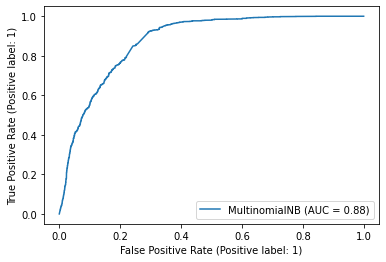

In [124]:
#PLOT
metrics.plot_roc_curve(nb_bow, bow_test, bow_target_test)
plt.show()

#### MODELO 2 - BIGRAMS

In [125]:
# NAIVE BAYES FOR BIGRAMS
nb_bigram = MultinomialNB()
nb_bigram.fit(bigram_train, bigram_target_train)

MultinomialNB()

In [126]:
# prediction for bigrams
pred_bigram = nb_bigram.predict(bigram_test)
print(metrics.accuracy_score(bigram_target_test, pred_bigram))
print('Matriz de confusion', metrics.confusion_matrix(bigram_target_test, pred_bigram))
print(metrics.classification_report(bigram_target_test, pred_bigram, target_names=['0', '1']))

0.7839634399667637
Matriz de confusion [[2194  546]
 [ 494 1580]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2740
           1       0.74      0.76      0.75      2074

    accuracy                           0.78      4814
   macro avg       0.78      0.78      0.78      4814
weighted avg       0.78      0.78      0.78      4814



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


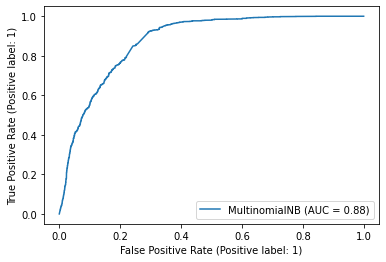

In [127]:
# figure
metrics.plot_roc_curve(nb_bigram, bigram_test, bigram_target_test)
plt.show()

#### MODELO 3 - TF-ID

In [128]:
# NAIVE BAYES FOR TF-ID
nb_tf_id = MultinomialNB()
nb_tf_id.fit(tf_id_train, tf_id_target_train)

MultinomialNB()

In [130]:
# prediction for tf-id
pred_tf_id = nb_tf_id.predict(tf_id_test)
print(metrics.accuracy_score(tf_id_target_test, pred_tf_id))
print('Matriz de confusion', metrics.confusion_matrix(tf_id_target_test, pred_tf_id))
print(metrics.classification_report(tf_id_target_test, pred_tf_id, target_names=['0', '1']))

0.8315330286663897
Matriz de confusion [[2390  350]
 [ 461 1613]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      2740
           1       0.82      0.78      0.80      2074

    accuracy                           0.83      4814
   macro avg       0.83      0.82      0.83      4814
weighted avg       0.83      0.83      0.83      4814



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


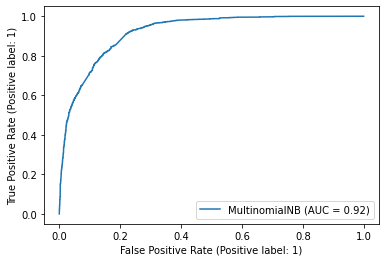

In [131]:
# figure
metrics.plot_roc_curve(nb_tf_id, tf_id_test, tf_id_target_test)
plt.show()